In [1]:
# Importações
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    roc_auc_score
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Cross validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Define funções essenciais

# Variáveis para padronização das métricas
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "roc_auc": roc_auc_score
}

def evaluate_metrics(y_true, y_pred, y_pred_proba, metrics=metrics):
    # Calculate scores
    scores = {}
    for name, metric in metrics.items():
        # Handle metrics that require probabilities (like ROC AUC)
        if name == 'roc_auc':
            scores[name] = metric(y_true, y_pred_proba)
        else:
            scores[name] = metric(y_true, y_pred)
    return scores

In [3]:
# Importa Dataframe contendo títulos de notícias relacionadas a saúde
df = pd.read_csv('dados/df_final.zip')

# Re-transforma as listas em listas
df['title'] = df['title'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['corpo_texto'] = df['corpo_texto'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

display(df)

,title,link,date,corpo_texto,classe
0,"[cai, número, casos, graves, coronavírus, frança]",https://noticias.uol.com.br/ultimas-noticias/e...,23/06/2020 03h33,"[parir, jun, efe, frança, anunciar, n, segunda...",1
1,"[aviões, pandemia, pátio, aeroporto, vira, gra...",https://economia.uol.com.br/todos-a-bordo/2020...,08/05/2020 04h00,"[cancelamento, voo, causar, pandemia, covid19,...",1
2,"[ladrão, roubou, 98, doses, coronavac, sp, pla...",https://noticias.uol.com.br/saude/ultimas-noti...,25/03/2021 13h11,"[homem, roubar, dose, vacinar, coronavac, covi...",1
3,"[sinovac, pagou, propina, doria, trazer, vacin...",https://www.boatos.org/saude/sinovac-pagou-pro...,09/12/2020,"[ih, enzuh, trazer, novidade, mídia, hehe, dit...",0
4,"[ofíciosacesse, ofícios, eventos, adversos, pó...",https://www.gov.br/saude/pt-br/vacinacao/esavi...,Data não disponível,"[ofícios, ministério, saúde, ir, conteúdo, 1, ...",1
...,...,...,...,...,...
3320,"[rio, janeiro, recebeu, imunizantes, contra, c...",https://www.gov.br/saude/pt-br/assuntos/notici...,Data não disponível,"[rio, janeiro, recebeu, imunizantes, contra, c...",1
3321,"[estratégia, vacinação, contra, covid19]",https://www.gov.br/saude/pt-br/vacinacao/publi...,Data não disponível,"[estratégia, vacinação, contra, covid19, minis...",1
3322,"[indonésia, inicia, vacinação, contra, covid19...",https://extra.globo.com/noticias/coronavirus/i...,Publicado em 13/01/21 11:12,"[indonésio, campanha, vacinação, covid19, n, q...",1
3323,"[fake, foto, mostre, corpos, idosos, covid19, ...",https://g1.globo.com/fato-ou-fake/coronavirus/...,25/04/2020,"[circular, rede, social, foto, homem, corpo, j...",0


In [4]:
# Separa porção para validação
df_main, df_validation = train_test_split(df, test_size=0.25, random_state=42, stratify=df['classe'])

display(df_main, df_validation)

,title,link,date,corpo_texto,classe
2626,"[onu, alerta, cias, aéreas, sobre, fadiga, tri...",https://noticias.uol.com.br/ultimas-noticias/a...,06/05/2020 17h47,"[agência, aviação, onu, alertar, n, quartafeir...",1
3260,"[dt, vacina]",https://www.gov.br/saude/pt-br/assuntos/saude-...,Data não disponível,"[dt, ministério, saúde, ir, conteúdo, 1, ir, p...",1
694,"[estudo, sugere, cobra, hospedeiro, coronavíru...",https://noticias.uol.com.br/saude/ultimas-noti...,23/01/2020 04h00,"[estudar, publicar, cientista, chinês, indicar...",1
2479,"[verdade, defensor, movimento, antivacinas, in...",http://www.e-farsas.com/e-verdade-que-um-defen...,Data não disponível,"[verdade, defensor, movimento, antivacinas, in...",1
2678,"[estados, correm, atrás, vacinas, após, autori...",https://noticias.uol.com.br/ultimas-noticias/r...,24/02/2021 16h10,"[autorização, supremo, tribunal, federal, stf,...",1
...,...,...,...,...,...
1575,"[saúde, repassa, r, 143, milhões, centros, enf...",https://www.gov.br/saude/pt-br/assuntos/notici...,Data não disponível,"[saúde, repassa, r, 143, milhões, centros, enf...",1
2688,"[câmara, aprova, projeto, reduzir, perdas, emp...",https://g1.globo.com/politica/noticia/2021/04/...,07/04/2021 18h06,"[câmara, deputar, aprovar, n, quartafeira, pro...",1
2118,"[mandetta, pede, bolsonaro, reflita, sobre, pa...",https://noticias.uol.com.br/saude/ultimas-noti...,09/07/2020 12h26,"[divulgação, diagnóstico, covid19, jair, bolso...",1
363,"[pneu, estoura, mata, primo, porteiro, atestad...",http://www.e-farsas.com/pneu-estoura-e-mata-o-...,Data não disponível,"[pneu, estoura, mata, primo, porteiro, atestad...",0


,title,link,date,corpo_texto,classe
1410,"[provas, ivermectina, testada, apenas, in, vit...",https://checamos.afp.com//nao-ha-provas-de-que...,27/05/2020 às 22:23,"[remédio, pra, piolho, ivermectina, matar, cov...",0
2530,"[stf, psol, impediram, vacinação, imigrantes, ...",http://www.e-farsas.com/o-stf-e-o-psol-impedir...,Data não disponível,"[stf, psol, impediram, vacinação, imigrantes, ...",0
3130,"[wall, street, journal, chama, vacinas, bivale...",https://medicospelavidacovid19.com.br/editoria...,Data não disponível,"[wall, street, journal, chama, vacinas, bivale...",0
2746,"[associação, tênis, eua, diz, ninguém, deveria...",https://www.uol.com.br/esporte/tenis/ultimas-n...,03/04/2020 21h20,"[associação, nacional, tênis, unir, pedir, hoj...",1
969,"[novas, doses, vacina, vindas, índia, fiocruz]",https://noticias.uol.com.br/ultimas-noticias/a...,23/02/2021 14h18,"[remessar, milhão, dose, vacinar, oxford, astr...",1
...,...,...,...,...,...
2071,"[butantan, reforçará, dados, sobre, aplicação,...",https://noticias.uol.com.br/ultimas-noticias/a...,13/04/2021 12h41,"[instituto, butantan, reforçar, informação, ap...",1
3153,"[coronavírus, pode, causar, genocídio, povos, ...",https://noticias.uol.com.br/ultimas-noticias/b...,25/03/2020 05h46,"[especialmente, vulnerável, doença, respiratór...",1
1631,"[biontech, vacina, máxima, eficácia, respeitad...",https://noticias.uol.com.br/ultimas-noticias/a...,05/01/2021 09h43,"[frankfurt, am, main, jan, afp, laboratório, b...",1
1097,"[acre, vacina, oral, poliomielite, substituída...",https://www.gov.br/saude/pt-br/assuntos/notici...,Data não disponível,"[acre, vacina, oral, poliomielite, substituída...",1


In [5]:
# Checa distribuição de classes entre dados separados
print(f'Distribuição para o df principal: {df_main['classe'].value_counts()[0]/\
      df_main['classe'].value_counts()[1]}')
print(f'\nDistribuição para o df de validação: {df_validation['classe'].value_counts()[0]/\
      df_validation['classe'].value_counts()[1]}')

Distribuição para o df principal: 0.47602131438721135

Distribuição para o df de validação: 0.475177304964539


In [6]:
# Inicializa o vetorizador de TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Criação de vetores
X = df_main['title'].apply(lambda x: ' '.join(x))
y = df_main['classe']

print("Dimensões de X:", X.shape)
print("Dimensões de y:", y.shape)

Dimensões de X: (2493,)
Dimensões de y: (2493,)


### Árvore de Decisão

In [7]:
# Cria modelo e define pipeline com TF-IDF
modelo_ad = DecisionTreeClassifier()
pipeline_ad = Pipeline([('TF-IDF', tfidf_vectorizer), ('modelo', modelo_ad)])

# Validação cruzada
resultados_ad = cross_validate(pipeline_ad, X, y, scoring=[score for score in metrics.keys()])

acc_ad = resultados_ad['test_accuracy'].mean()
acc_ad_std = np.std(resultados_ad['test_accuracy'])
prec_ad = resultados_ad['test_precision'].mean()
prec_ad_std = np.std(resultados_ad['test_precision'])
rocauc_ad = resultados_ad['test_roc_auc'].mean()
rocauc_ad_std = np.std(resultados_ad['test_roc_auc'])
print(f'Acurácia: {acc_ad:.3f}±{acc_ad_std:.3f}\
    \nPrecisão: {prec_ad:.3f}±{prec_ad_std:.3f}\
    \nROC-AUC: {rocauc_ad:.3f}±{rocauc_ad_std:.3f}')

Acurácia: 0.831±0.022    
Precisão: 0.880±0.010    
ROC-AUC: 0.812±0.019


### Floresta Aleatória

In [8]:
# Cria modelo
modelo_rf = RandomForestClassifier()
pipeline_rf = Pipeline([('TF-IDF', tfidf_vectorizer), ('modelo', modelo_rf)])

# Validação cruzada
resultados_rf = cross_validate(pipeline_rf, X, y, scoring=[score for score in metrics.keys()])

acc_rf = resultados_rf['test_accuracy'].mean()
acc_rf_std = np.std(resultados_rf['test_accuracy'])
prec_rf = resultados_rf['test_precision'].mean()
prec_rf_std = np.std(resultados_rf['test_precision'])
rocauc_rf = resultados_rf['test_roc_auc'].mean()
rocauc_rf_std = np.std(resultados_rf['test_roc_auc'])
print(f'Acurácia: {acc_rf:.3f}±{acc_rf_std:.3f}\
    \nPrecisão: {prec_rf:.3f}±{prec_rf_std:.3f}\
    \nROC-AUC: {rocauc_rf:.3f}±{rocauc_rf_std:.3f}')

Acurácia: 0.878±0.018    
Precisão: 0.875±0.018    
ROC-AUC: 0.921±0.016


### Regressão Logística

In [9]:
# Cria modelo
modelo_lr = LogisticRegression()
pipeline_lr = Pipeline([('TF-IDF', tfidf_vectorizer), ('modelo', modelo_lr)])

# Validação cruzada
resultados_lr = cross_validate(pipeline_lr, X, y, scoring=[score for score in metrics.keys()])

acc_lr = resultados_lr['test_accuracy'].mean()
acc_lr_std = np.std(resultados_lr['test_accuracy'])
prec_lr = resultados_lr['test_precision'].mean()
prec_lr_std = np.std(resultados_lr['test_precision'])
rocauc_lr = resultados_lr['test_roc_auc'].mean()
rocauc_lr_std = np.std(resultados_lr['test_roc_auc'])
print(f'Acurácia: {acc_lr:.3f}±{acc_lr_std:.3f}\
    \nPrecisão: {prec_lr:.3f}±{prec_lr_std:.3f}\
    \nROC-AUC: {rocauc_lr:.3f}±{rocauc_lr_std:.3f}')

Acurácia: 0.869±0.017    
Precisão: 0.845±0.018    
ROC-AUC: 0.942±0.016


### SVM

In [10]:
# Parâmetros
C = 77
kernel = 'rbf'
gamma = 0.01

# Cria modelo
modelo_svm = svm.SVC(C=C, kernel=kernel, gamma=gamma, probability=True)
pipeline_svm = Pipeline([('TF-IDF', tfidf_vectorizer), ('modelo', modelo_svm)])

# Validação cruzada
resultados_svm = cross_validate(pipeline_svm, X, y, scoring=[score for score in metrics.keys()])

acc_svm = resultados_svm['test_accuracy'].mean()
acc_svm_std = np.std(resultados_svm['test_accuracy'])
prec_svm = resultados_svm['test_precision'].mean()
prec_svm_std = np.std(resultados_svm['test_precision'])
rocauc_svm = resultados_svm['test_roc_auc'].mean()
rocauc_svm_std = np.std(resultados_svm['test_roc_auc'])
print(f'Acurácia: {acc_svm:.3f}±{acc_svm_std:.3f}\
    \nPrecisão: {prec_svm:.3f}±{prec_svm_std:.3f}\
    \nROC-AUC: {rocauc_svm:.3f}±{rocauc_svm_std:.3f}')

Acurácia: 0.903±0.022    
Precisão: 0.901±0.018    
ROC-AUC: 0.946±0.015


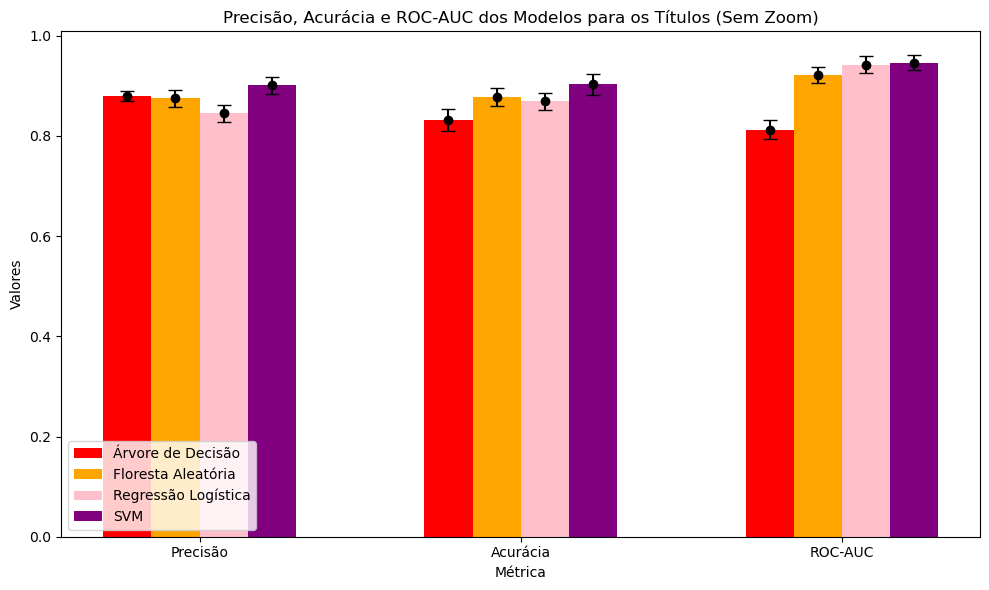

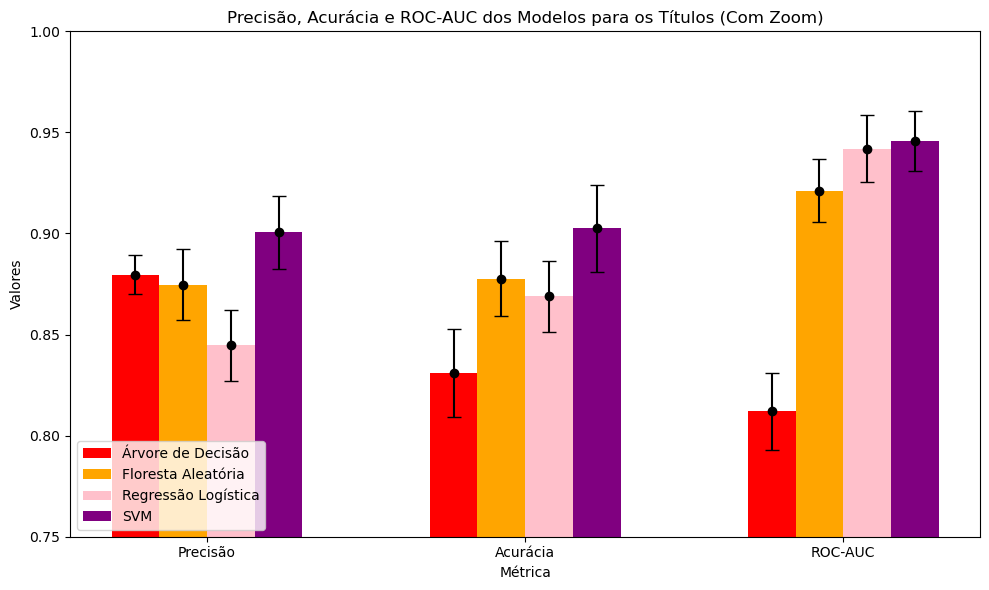

In [11]:
# Definindo os dados
accuracy_list = [acc_ad, acc_rf, acc_lr, acc_svm]
precision_list = [prec_ad, prec_rf, prec_lr, prec_svm]
rocauc_list = [rocauc_ad, rocauc_rf, rocauc_lr, rocauc_svm]
acc_std_list = [acc_ad_std, acc_rf_std, acc_lr_std, acc_svm_std]
prec_std_list = [prec_ad_std, prec_rf_std, prec_lr_std, prec_svm_std]
rocauc_std_list = [rocauc_ad_std, rocauc_rf_std, rocauc_lr_std, rocauc_svm_std]
model_labels = ['Árvore de Decisão', 'Floresta Aleatória', 'Regressão Logística', 'SVM']
colors = ['red', 'orange', 'pink', 'purple']

# Posições das barras para os grupos
x = np.arange(3)  # Precisão, Acurácia e ROC-AUC
width = 0.15      # Largura das barras

# Criando o gráfico sem zoom
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(model_labels)):
    # Precisão
    ax.bar(x[0] + i * width - (1.5 * width), precision_list[i], width, label=model_labels[i], color=colors[i])
    ax.errorbar(x[0] + i * width - (1.5 * width), precision_list[i], yerr=prec_std_list[i], fmt='o', color='black', capsize=5)
    # Acurácia
    ax.bar(x[1] + i * width - (1.5 * width), accuracy_list[i], width, color=colors[i])
    ax.errorbar(x[1] + i * width - (1.5 * width), accuracy_list[i], yerr=acc_std_list[i], fmt='o', color='black', capsize=5)
    # ROC-AUC
    ax.bar(x[2] + i * width - (1.5 * width), rocauc_list[i], width, color=colors[i])
    ax.errorbar(x[2] + i * width - (1.5 * width), rocauc_list[i], yerr=rocauc_std_list[i], fmt='o', color='black', capsize=5)

# Configurando os rótulos e título
ax.set_xlabel('Métrica')
ax.set_ylabel('Valores')
ax.set_title('Precisão, Acurácia e ROC-AUC dos Modelos para os Títulos (Sem Zoom)')
ax.set_xticks(x)
ax.set_xticklabels(['Precisão', 'Acurácia', 'ROC-AUC'])
ax.legend(loc='lower left')

# Exibindo o gráfico sem zoom
plt.tight_layout()
plt.show()

# Criando o gráfico com zoom
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(model_labels)):
    # Precisão
    ax.bar(x[0] + i * width - (1.5 * width), precision_list[i], width, label=model_labels[i], color=colors[i])
    ax.errorbar(x[0] + i * width - (1.5 * width), precision_list[i], yerr=prec_std_list[i], fmt='o', color='black', capsize=5)
    # Acurácia
    ax.bar(x[1] + i * width - (1.5 * width), accuracy_list[i], width, color=colors[i])
    ax.errorbar(x[1] + i * width - (1.5 * width), accuracy_list[i], yerr=acc_std_list[i], fmt='o', color='black', capsize=5)
    # ROC-AUC
    ax.bar(x[2] + i * width - (1.5 * width), rocauc_list[i], width, color=colors[i])
    ax.errorbar(x[2] + i * width - (1.5 * width), rocauc_list[i], yerr=rocauc_std_list[i], fmt='o', color='black', capsize=5)

# Configurando os rótulos e título
ax.set_xlabel('Métrica')
ax.set_ylabel('Valores')
ax.set_title('Precisão, Acurácia e ROC-AUC dos Modelos para os Títulos (Com Zoom)')
ax.set_xticks(x)
ax.set_xticklabels(['Precisão', 'Acurácia', 'ROC-AUC'])
ax.legend(loc='lower left')

# Definindo o limite do eixo y para dar o "zoom"
plt.ylim(0.75, 1)

# Exibindo o gráfico com zoom
plt.tight_layout()
plt.show()

### Teste com dados separados pra validação

In [12]:
# Inicializa o vetorizador de TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Criação de vetores
X_val = df_validation['title'].apply(lambda x: ' '.join(x))
y_val = df_validation['classe'].to_numpy()

print("Dimensões de X:", X_val.shape)
print("Dimensões de y:", y_val.shape)

Dimensões de X: (832,)
Dimensões de y: (832,)


In [13]:
# Calcula score de cada método para df de validação

pipelines = [pipeline_ad, pipeline_rf, pipeline_lr, pipeline_svm]

accuracy_list = []
precision_list = []
rocauc_list = []


for pipeline in pipelines:
    pipeline.fit(X,y)
    y_val_pred = pipeline.predict(X_val)
    y_val_pred_proba = pipeline.predict_proba(X_val)[:,1]
    scores = evaluate_metrics(y_val, y_val_pred, y_val_pred_proba)
    
    accuracy_list.append(scores['accuracy'])
    precision_list.append(scores['precision'])
    rocauc_list.append(scores['roc_auc'])
    
    print(f'{str(pipeline[1])}:\n    Acurácia: {scores['accuracy']:.3f}\
        \n    Precisão: {scores['precision']:.3f}\n    ROC-AUC: {scores['roc_auc']:.3f}\n')

DecisionTreeClassifier():
    Acurácia: 0.815        
    Precisão: 0.865
    ROC-AUC: 0.792

RandomForestClassifier():
    Acurácia: 0.873        
    Precisão: 0.862
    ROC-AUC: 0.916

LogisticRegression():
    Acurácia: 0.867        
    Precisão: 0.844
    ROC-AUC: 0.942

SVC(C=77, gamma=0.01, probability=True):
    Acurácia: 0.898        
    Precisão: 0.895
    ROC-AUC: 0.946



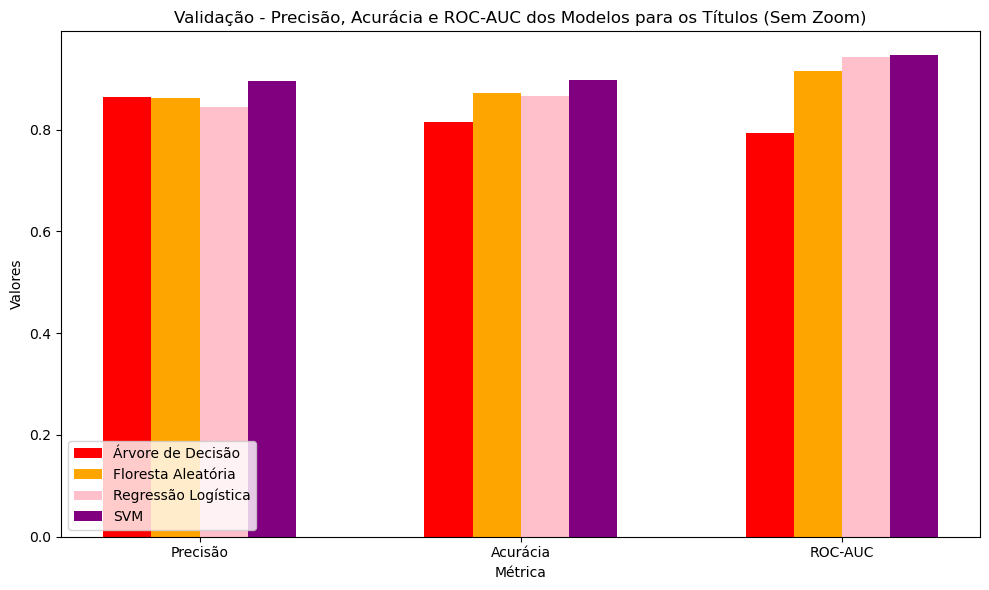

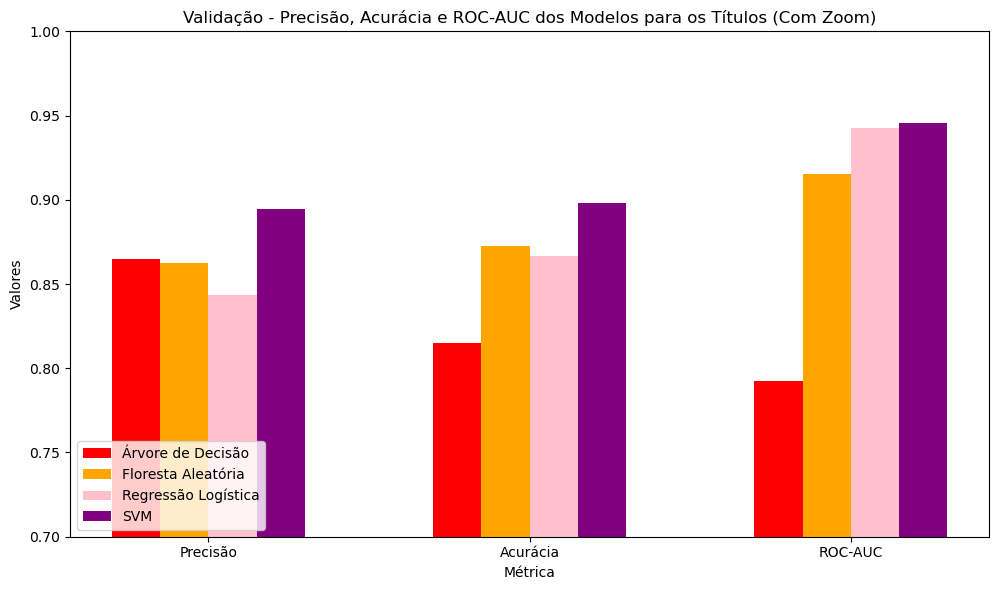

In [14]:
# Positions for the groups of bars
x = np.arange(3)  # One point for "Precision", "Accuracy", and "ROC-AUC"
width = 0.15  # Width of the bars

# Creating the plot without zoom
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(model_labels)):
    # Precision
    ax.bar(x[0] + i * width - (1.5 * width), precision_list[i], width, label=model_labels[i], color=colors[i])
    # Accuracy
    ax.bar(x[1] + i * width - (1.5 * width), accuracy_list[i], width, color=colors[i])
    # ROC-AUC
    ax.bar(x[2] + i * width - (1.5 * width), rocauc_list[i], width, color=colors[i])

# Configuring labels and title
ax.set_xlabel('Métrica')
ax.set_ylabel('Valores')
ax.set_title('Validação - Precisão, Acurácia e ROC-AUC dos Modelos para os Títulos (Sem Zoom)')
ax.set_xticks(x)
ax.set_xticklabels(['Precisão', 'Acurácia', 'ROC-AUC'])
ax.legend(loc='lower left')

# Displaying the plot without zoom
plt.tight_layout()
plt.show()

# Creating the plot with zoom
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(model_labels)):
    # Precision
    ax.bar(x[0] + i * width - (1.5 * width), precision_list[i], width, label=model_labels[i], color=colors[i])
    # Accuracy
    ax.bar(x[1] + i * width - (1.5 * width), accuracy_list[i], width, color=colors[i])
    # ROC-AUC
    ax.bar(x[2] + i * width - (1.5 * width), rocauc_list[i], width, color=colors[i])

# Configuring labels and title
ax.set_xlabel('Métrica')
ax.set_ylabel('Valores')
ax.set_title('Validação - Precisão, Acurácia e ROC-AUC dos Modelos para os Títulos (Com Zoom)')
ax.set_xticks(x)
ax.set_xticklabels(['Precisão', 'Acurácia', 'ROC-AUC'])
ax.legend(loc='lower left')

# Setting y-axis limit for zoom
plt.tight_layout()
plt.ylim(0.7, 1)

# Displaying the plot with zoom
plt.show()